In [2]:
import pandas as pd 
from dbfread import DBF
import warnings
warnings.filterwarnings("ignore")
path_file = 'taxi_zones.dbf'

registros = []
with DBF('taxi_zones.dbf') as dbf:
    for registro in dbf:
        registros.append(dict(registro))

df = pd.DataFrame(registros)

df = df[['OBJECTID','zone','borough']]

df=df.rename(columns={'OBJECTID':'Location_id','zone':'Location_name','borough':'Borough'})
df=df.drop_duplicates(subset=['Location_name','Borough'])
df.to_csv('clean_data/clean_taxi_zone.csv',index=False, sep=';')


In [2]:
import pandas as pd

In [4]:
df= pd.read_csv('clean_data\clean_electric_car_data.csv')

In [11]:
df[df.duplicated()]

,Brand,Model,PriceUSD


In [10]:
df.drop_duplicates(inplace=True)

In [12]:
df.to_csv('clean_electric_car_data.csv', index=False)

In [22]:
df= pd.read_csv('clean_data\clean_light_duty_vehicles.csv')

In [23]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.rename(columns={'Model Year':'Year','Manufacturer':'Brand'},inplace=True)

df.to_csv('clean_data/clean_light_duty_vehicles.csv', index=False)

In [15]:
df[df.duplicated()]

,Model,Model Year,Manufacturer,Fuel
12,A6 quattro,2022,Audi,Hybrid Electric
77,Silverado 4WD,2022,Chevrolet,Biodiesel (B20)
95,Explorer Platinum HEV,2022,Ford,Hybrid Electric
231,GLE 450 4MATIC,2022,Mercedes-Benz,Hybrid Electric
263,1500 4X2,2022,Ram,Hybrid Electric
...,...,...,...,...
2906,Super Club Wagon,1999,Ford,CNG - Compressed Natural Gas
2931,Econoline Clubwagon,1998,Ford,CNG - Compressed Natural Gas
2934,Econoline E-250,1998,Ford,CNG - Compressed Natural Gas
2952,Econoline Clubwagon,1997,Ford,CNG - Compressed Natural Gas


In [19]:
df.shape

(2870, 4)

In [18]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [21]:
df.isnull().sum()

Model           0
Model Year      0
Manufacturer    0
Fuel            0
dtype: int64

In [ ]:
df.rename(columns={'Model Year':'Year','Manufacturer':'Brand'},inplace=True)

In [2]:
import pandas as pd

In [24]:
df= pd.read_csv('clean_data\clean_data_report_monthly.csv', sep=';')

In [11]:
df

,Unnamed: 0,License Class,Year,Month,Trips Per Day,Trips Per Day Shared,Unique Vehicles
0,0,1,2022,1,13440,0,7136
1,1,1,2022,2,17521,0,7265
2,2,1,2022,3,17453,0,6909
3,3,1,2022,4,18597,0,7319
4,4,1,2022,5,16527,0,7202
...,...,...,...,...,...,...,...
114,114,0,2023,4,109071,0,8172
115,115,0,2023,5,112843,0,8317
116,116,0,2023,6,109766,0,8384
117,117,0,2023,7,93315,0,8306


In [12]:
df.isnull().sum()

Unnamed: 0              0
License Class           0
Year                    0
Month                   0
Trips Per Day           0
Trips Per Day Shared    0
Unique Vehicles         0
dtype: int64

<Axes: >

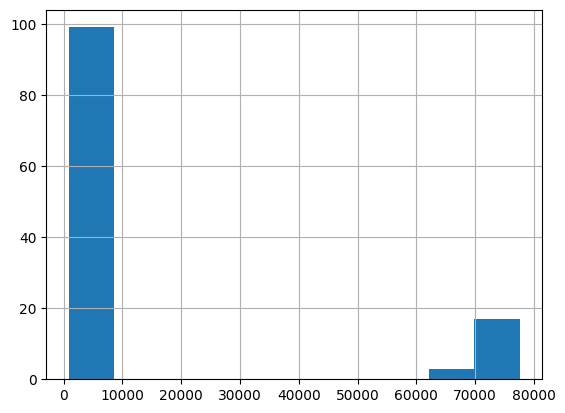

In [19]:
df['Unique Vehicles'].hist()

In [17]:
df.describe()

,Unnamed: 0,License Class,Year,Month,Trips Per Day,Trips Per Day Shared,Unique Vehicles
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,59.000000,0.663866,2022.394958,5.689076,125996.689076,677.672269,15959.210084
std,34.496377,0.474383,0.490909,3.220032,217898.988288,2326.382793,26016.363439
min,0.000000,0.000000,2022.000000,1.000000,763.000000,0.000000,850.000000
25%,29.500000,0.000000,2022.000000,3.000000,2233.500000,0.000000,1549.500000
50%,59.000000,1.000000,2022.000000,5.000000,20152.000000,0.000000,6449.000000
75%,88.500000,1.000000,2023.000000,8.000000,108608.500000,0.000000,7711.000000
max,118.000000,1.000000,2023.000000,12.000000,658499.000000,12983.000000,77565.000000


In [20]:
df=df.rename(columns={'License Class':'Service_type_id','Unnamed: 0':'Report_id'})

In [21]:
df

,Report_id,Service_type_id,Year,Month,Trips Per Day,Trips Per Day Shared,Unique Vehicles
0,0,1,2022,1,13440,0,7136
1,1,1,2022,2,17521,0,7265
2,2,1,2022,3,17453,0,6909
3,3,1,2022,4,18597,0,7319
4,4,1,2022,5,16527,0,7202
...,...,...,...,...,...,...,...
114,114,0,2023,4,109071,0,8172
115,115,0,2023,5,112843,0,8317
116,116,0,2023,6,109766,0,8384
117,117,0,2023,7,93315,0,8306


In [25]:

df=df.rename(columns={'Unnamed: 0':'Report_id','License Class':'Service_type_id','Trips Per Day':'Trips_per_day','Trips Per Day Shared':'Shared_trips_per_day'})


In [26]:
df.to_csv('KPI_2_ShareTrips.csv', sep=';', index=False)

In [100]:
df=pd.read_csv('file.csv')

In [101]:
df[['Year','Brand','Model','Fuel']]=df['vehicle'].str.extract('(\d{4}) (Land Rover|(?:\w+-\w+)|(?:\w+)) (.*) (EV|Gasoline|Hybrid)', expand=True)
df.drop(columns=['vehicle'], inplace=True)

,annual_fuel_use,annual_electricity_use,annual_fuel_elec_cost,annual_operating_cost,cost_per_mile,annual_emissions_lbs_CO2,Year,Brand,Model,Fuel
0,0 gal,"3,971 kWh",$772,"$2,877",$0.24,2329.0,2023,Audi,Q4 e-tron,EV
1,0 gal,"4,391 kWh",$854,"$2,959",$0.25,2576.0,2023,Audi,Q4 e-tron quattro,EV
2,0 gal,"4,289 kWh",$834,"$2,939",$0.25,2516.0,2023,Audi,Q4 e-tron Sportback,EV
3,459 gal,0 kWh,"$1,648","$3,905",$0.33,11014.0,2023,Audi,Q5 quattro,Hybrid
4,596 gal,0 kWh,"$2,138","$4,396",$0.37,14295.0,2023,Audi,Q7,Hybrid
...,...,...,...,...,...,...,...,...,...,...
145,0 gal,"4,028 kWh",$783,"$2,888",$0.24,2363.0,2022,Volkswagen,ID.4 Pro S,EV
146,252 gal,"3,019 kWh","$1,492","$3,749",$0.31,7819.0,2022,Volvo,XC60 T8 AWD Recharge Plug-in,Hybrid
147,103 gal,"4,547 kWh","$1,253","$3,510",$0.29,5133.0,2022,Volvo,XC60 T8 AWD Recharge ext. Range Plug-in,Hybrid
148,249 gal,"2,972 kWh","$1,470","$3,728",$0.31,7711.0,2022,Volvo,XC90 T8 AWD Recharge Plug-in,Hybrid


In [104]:
df['annual_operating_cost'].str.replace('$','')

0      2,877
1      2,959
2      2,939
3      3,905
4      4,396
       ...  
145    2,888
146    3,749
147    3,510
148    3,728
149    3,502
Name: annual_operating_cost, Length: 150, dtype: object

In [70]:
type(df['annual_operating_cost'][0])
df['annual_operating_cost'][0].replace('$','')

'2,877'

In [53]:
df['Vehicle'].unique()

array(['Audi Q4 e-tron', 'Audi Q4 e-tron quattro',
       'Audi Q4 e-tron Sportback', 'Audi Q5 quattro', 'Audi Q7',
       'Audi Q8', 'Audi RS Q8', 'BMW Alpina XB7',
       'BMW iX M60 (21 inch wheels)', 'BMW iX xDrive50 (20 inch wheels)',
       'BMW X5 sDrive40i', 'BMW X5 xDrive40i', 'BMW X5 xDrive45e Plug-in',
       'BMW X6 xDrive40i', 'BMW X7 M60i xDrive', 'BMW X7 xDrive40i',
       'BMW XM Plug-in', 'Ford Escape AWD HEV', 'Ford Escape FWD HEV',
       'Ford Explorer HEV AWD', 'Ford Explorer HEV RWD',
       'Ford Mustang Mach-E GT', 'Ford Mustang Mach-E RWD Extended',
       'Honda CR-V AWD', 'Honda CR-V FWD', 'Hyundai Kona Electric',
       'Hyundai Santa Fe Plug-in Hybrid Plug-in',
       'Hyundai Tucson Plug-in Hybrid Plug-in',
       'Jeep Grand Cherokee 4xe Plug-in', 'Jeep Wagoneer 2WD',
       'Jeep Wagoneer 4WD', 'Jeep Wrangler 4dr 4xe Plug-in',
       'Kia Sorento Hybrid AWD', 'Kia Sorento Hybrid FWD',
       'Kia Sportage Hybrid AWD', 'Kia Sportage Hybrid FWD',
       'L

In [ ]:
df['Vehicle'].replace()
deleted_zones, replacement_zone, inplace=True

In [37]:
df.drop(columns=['vehicle'])

,annual_fuel_use,annual_electricity_use,annual_fuel_elec_cost,annual_operating_cost,cost_per_mile,annual_emissions_lbs_CO2,Year,Vehicle
0,0 gal,"3,971 kWh",$772,"$2,877",$0.24,2329.0,2023,Audi Q4 e-tron EV
1,0 gal,"4,391 kWh",$854,"$2,959",$0.25,2576.0,2023,Audi Q4 e-tron quattro EV
2,0 gal,"4,289 kWh",$834,"$2,939",$0.25,2516.0,2023,Audi Q4 e-tron Sportback EV
3,459 gal,0 kWh,"$1,648","$3,905",$0.33,11014.0,2023,Audi Q5 quattro Hybrid
4,596 gal,0 kWh,"$2,138","$4,396",$0.37,14295.0,2023,Audi Q7 Hybrid
...,...,...,...,...,...,...,...,...
145,0 gal,"4,028 kWh",$783,"$2,888",$0.24,2363.0,2022,Volkswagen ID.4 Pro S EV
146,252 gal,"3,019 kWh","$1,492","$3,749",$0.31,7819.0,2022,Volvo XC60 T8 AWD Recharge Plug-in Hybrid
147,103 gal,"4,547 kWh","$1,253","$3,510",$0.29,5133.0,2022,Volvo XC60 T8 AWD Recharge ext. Range Plug-in ...
148,249 gal,"2,972 kWh","$1,470","$3,728",$0.31,7711.0,2022,Volvo XC90 T8 AWD Recharge Plug-in Hybrid


In [31]:
df.dtypes

vehicle                      object
annual_fuel_use              object
annual_electricity_use       object
annual_fuel_elec_cost        object
annual_operating_cost        object
cost_per_mile                object
annual_emissions_lbs_CO2    float64
dtype: object